<a href="https://colab.research.google.com/github/Maha3061/Global-Terrorism-Analysis/blob/main/TimeSeriesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import collections

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# Display up to 150 rows and columns
pd.set_option('display.max_rows', 220)
pd.set_option('display.max_columns', 150)

# Set the figure size for plots
mpl.rcParams['figure.figsize'] = (14.6, 9.0)

# Set the Seaborn default style for plots
sns.set()

# Set the color palette
sns.set_palette(sns.color_palette("muted"))

In [ ]:
# Load the preprocessed GTD dataset
gtd_df = pd.read_csv('/content/drive/MyDrive/data/gtdeda.csv', low_memory=False, index_col = 0,
                      na_values=[''])

In [ ]:
# Display a summary of the data frame
gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110698 entries, 197001000000.0 to 201712000000.0
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             110698 non-null  int64  
 1   imonth            110698 non-null  int64  
 2   iday              110698 non-null  int64  
 3   country_txt       110698 non-null  object 
 4   region_txt        110698 non-null  object 
 5   provstate         110698 non-null  object 
 6   city              110698 non-null  object 
 7   latitude          110698 non-null  float64
 8   longitude         110698 non-null  float64
 9   specificity       110698 non-null  float64
 10  summary           110698 non-null  object 
 11  attacktype1_txt   110698 non-null  object 
 12  targtype1_txt     110698 non-null  object 
 13  targsubtype1_txt  110698 non-null  object 
 14  corp1             110698 non-null  object 
 15  target1           110698 non-null  object 
 1

In [ ]:
# List of attributes that are categorical
cat_attrs = ['extended_txt', 'country_txt', 'region_txt', 'specificity', 'vicinity_txt',
             'crit1_txt', 'crit2_txt', 'crit3_txt', 'doubtterr_txt', 'multiple_txt',
             'success_txt', 'suicide_txt', 'attacktype1_txt', 'targtype1_txt',
             'targsubtype1_txt', 'natlty1_txt', 'guncertain1_txt', 'individual_txt',
             'claimed_txt', 'weaptype1_txt', 'weapsubtype1_txt', 'property_txt',
             'ishostkid_txt', 'INT_LOG_txt', 'INT_IDEO_txt','INT_MISC_txt', 'INT_ANY_txt']

for cat in cat_attrs:
    gtd_df[cat] = gtd_df[cat].astype('category')

# Data time feature added during EDA
gtd_df['incident_date'] = pd.to_datetime(gtd_df['incident_date'])

# Necessary for single data type
gtd_df['gname'] = gtd_df['gname'].astype('str')

gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110698 entries, 197001000000.0 to 201712000000.0
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   iyear             110698 non-null  int64         
 1   imonth            110698 non-null  int64         
 2   iday              110698 non-null  int64         
 3   country_txt       110698 non-null  category      
 4   region_txt        110698 non-null  category      
 5   provstate         110698 non-null  object        
 6   city              110698 non-null  object        
 7   latitude          110698 non-null  float64       
 8   longitude         110698 non-null  float64       
 9   specificity       110698 non-null  category      
 10  summary           110698 non-null  object        
 11  attacktype1_txt   110698 non-null  category      
 12  targtype1_txt     110698 non-null  category      
 13  targsubtype1_txt  110698 non-null  c

In [ ]:
gtd_df = gtd_df.drop(['provstate', 'city', 'summary', 'corp1', 'target1',
                                  'scite1', 'dbsource'], axis=1)

gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110698 entries, 197001000000.0 to 201712000000.0
Data columns (total 42 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   iyear             110698 non-null  int64         
 1   imonth            110698 non-null  int64         
 2   iday              110698 non-null  int64         
 3   country_txt       110698 non-null  category      
 4   region_txt        110698 non-null  category      
 5   latitude          110698 non-null  float64       
 6   longitude         110698 non-null  float64       
 7   specificity       110698 non-null  category      
 8   attacktype1_txt   110698 non-null  category      
 9   targtype1_txt     110698 non-null  category      
 10  targsubtype1_txt  110698 non-null  category      
 11  natlty1_txt       110698 non-null  category      
 12  gname             110698 non-null  object        
 13  nperpcap          110698 non-null  f

In [ ]:
scaler = preprocessing.StandardScaler()

# List of numeric attributes
scale_attrs = ['nperpcap', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte']

# Normalize the attributes in place
gtd_df[scale_attrs] = scaler.fit_transform(gtd_df[scale_attrs])

# View the transformation
gtd_df[scale_attrs].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nperpcap,110698.0,1.027000e-18,1.000005,-0.039941,-0.039941,-0.039941,-0.039941,221.519960
nkill,110698.0,-5.905250e-18,1.000005,-0.187548,-0.187548,-0.187548,-0.096261,126.153844
nkillus,110698.0,6.482937e-18,1.000005,-0.007215,-0.007215,-0.007215,-0.007215,232.874624
nkillter,110698.0,1.129700e-17,1.000005,-0.068373,-0.068373,-0.068373,-0.068373,165.550216
nwound,110698.0,-8.215999e-18,1.000005,-0.071968,-0.071968,-0.071968,-0.047918,196.914565
nwoundus,110698.0,-1.925625e-19,1.000005,-0.011038,-0.011038,-0.011038,-0.011038,242.823839
nwoundte,110698.0,6.675500e-18,1.000005,-0.029505,-0.029505,-0.029505,-0.029505,197.980079


In [ ]:
iraq_df = gtd_df[gtd_df['country_txt'] == "Iraq"].query('2006<iyear<=2016')

iraq_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9652 entries, 200701000000.0 to 201612000000.0
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   iyear             9652 non-null   int64         
 1   imonth            9652 non-null   int64         
 2   iday              9652 non-null   int64         
 3   country_txt       9652 non-null   category      
 4   region_txt        9652 non-null   category      
 5   latitude          9652 non-null   float64       
 6   longitude         9652 non-null   float64       
 7   specificity       9652 non-null   category      
 8   attacktype1_txt   9652 non-null   category      
 9   targtype1_txt     9652 non-null   category      
 10  targsubtype1_txt  9652 non-null   category      
 11  natlty1_txt       9652 non-null   category      
 12  gname             9652 non-null   object        
 13  nperpcap          9652 non-null   float64       
 14 

In [ ]:
# Group by incident_date
iraq_counts = iraq_df.groupby(['incident_date'], as_index = False).count()

# Select incident_date and a column for the counts
iraq_counts = iraq_counts[['incident_date', 'iyear']]
iraq_counts.columns = ['incident_date','daily_attacks']
iraq_counts.head()

,incident_date,daily_attacks
0,2007-01-16,1
1,2007-01-19,1
2,2007-01-22,2
3,2007-01-24,1
4,2007-01-25,1


In [ ]:
idx = pd.date_range('2007-01-01', '2016-12-31')

iraq_ts = iraq_counts.set_index('incident_date')

iraq_ts = iraq_ts.reindex(idx, fill_value=0)
iraq_ts.head()

,daily_attacks
2007-01-01,0
2007-01-02,0
2007-01-03,0
2007-01-04,0
2007-01-05,0


In [ ]:
iraq_ts.describe()

,daily_attacks
count,3653.000000
mean,2.642212
std,3.183567
min,0.000000
25%,0.000000
50%,2.000000
75%,4.000000
max,54.000000


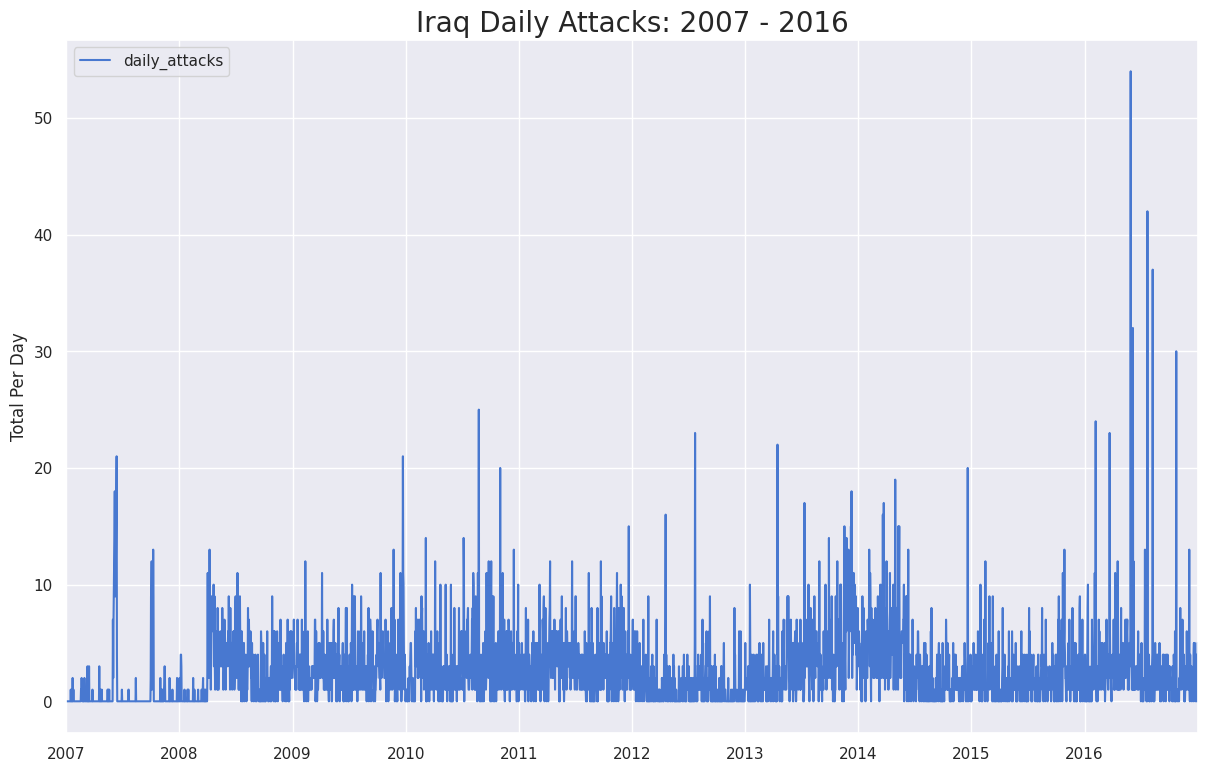

In [ ]:
iraq_ts.plot()
plt.title('Iraq Daily Attacks: 2007 - 2016', fontsize=20);
plt.ylabel('Total Per Day')
plt.show();

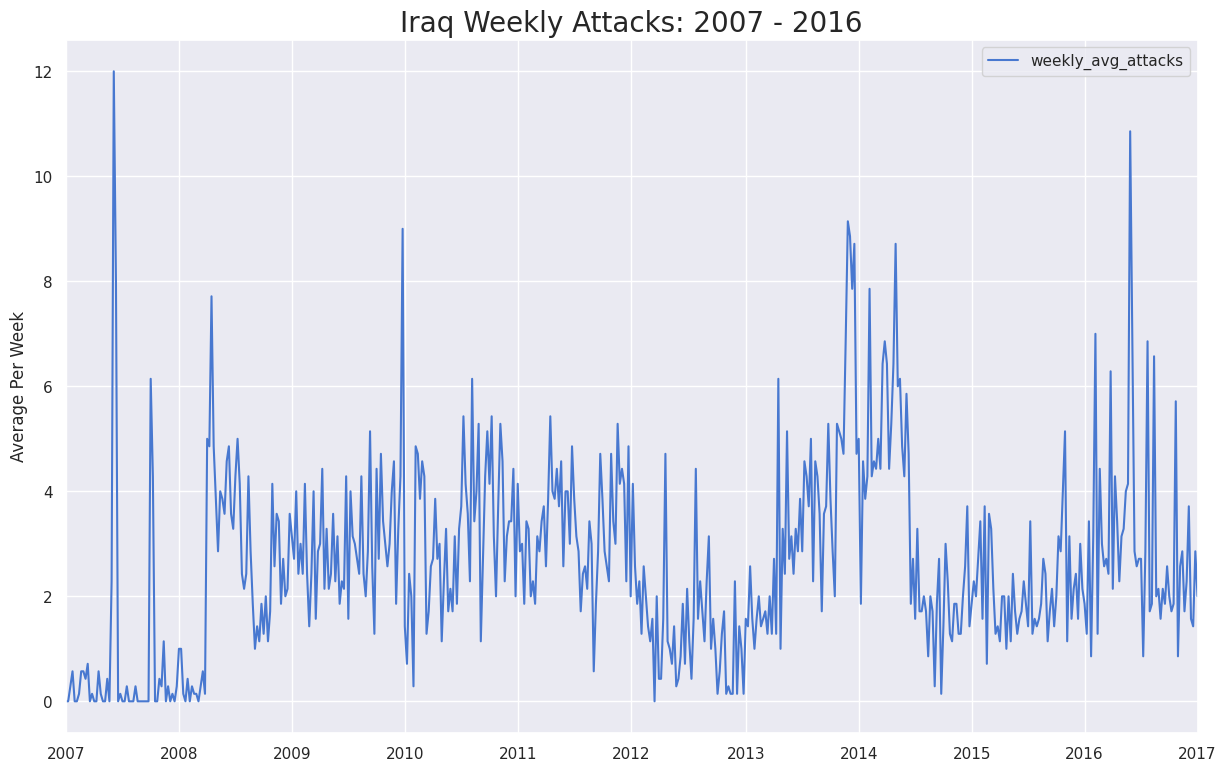

In [ ]:
weekly_summary = pd.DataFrame()
weekly_summary['weekly_avg_attacks'] = iraq_ts.daily_attacks.resample('W').mean()

weekly_summary.plot()
plt.title('Iraq Weekly Attacks: 2007 - 2016', fontsize=20);
plt.ylabel('Average Per Week')
plt.show();

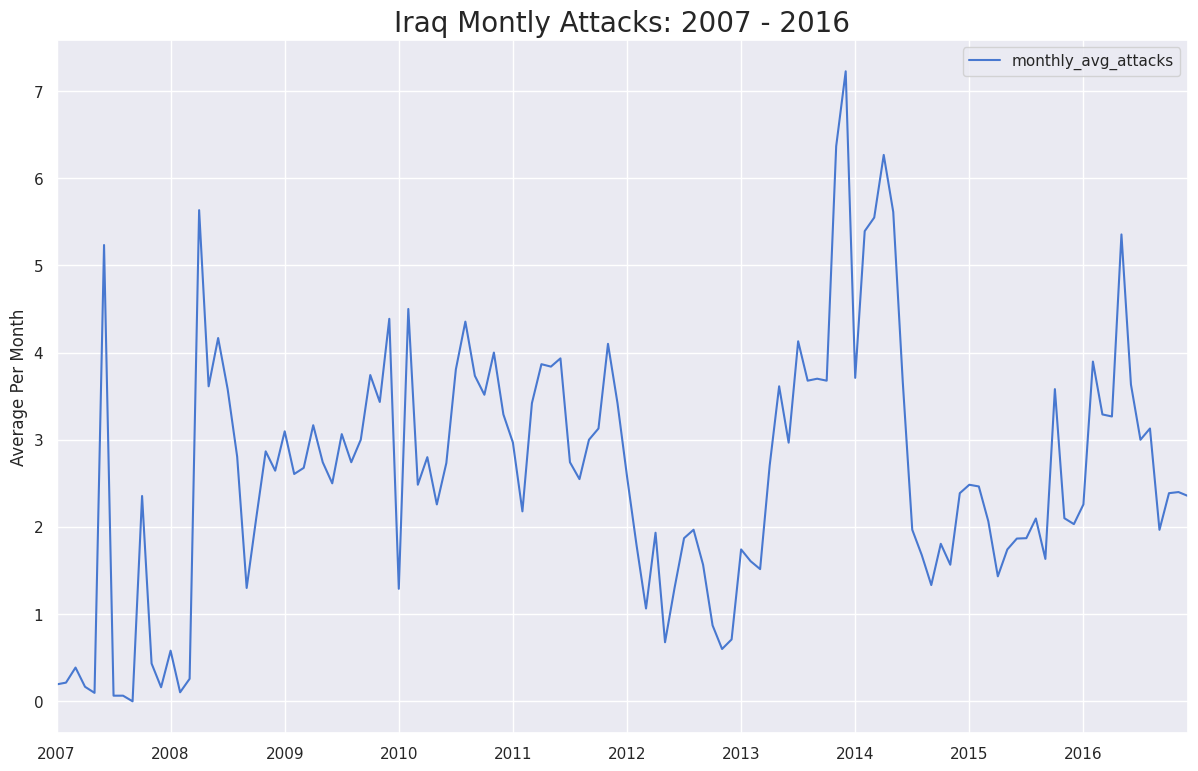

In [ ]:
monthly_summary = pd.DataFrame()
monthly_summary['monthly_avg_attacks'] = iraq_ts.daily_attacks.resample('M').mean()

monthly_summary.plot()
plt.title('Iraq Montly Attacks: 2007 - 2016', fontsize=20);
plt.ylabel('Average Per Month')
plt.show();

In [ ]:
# Use a 30 day span for averaging
iraq_ewm = iraq_ts.ewm(span=30, adjust=False).mean()

iraq_ewm.head()

,daily_attacks
2007-01-01,0.0
2007-01-02,0.0
2007-01-03,0.0
2007-01-04,0.0
2007-01-05,0.0


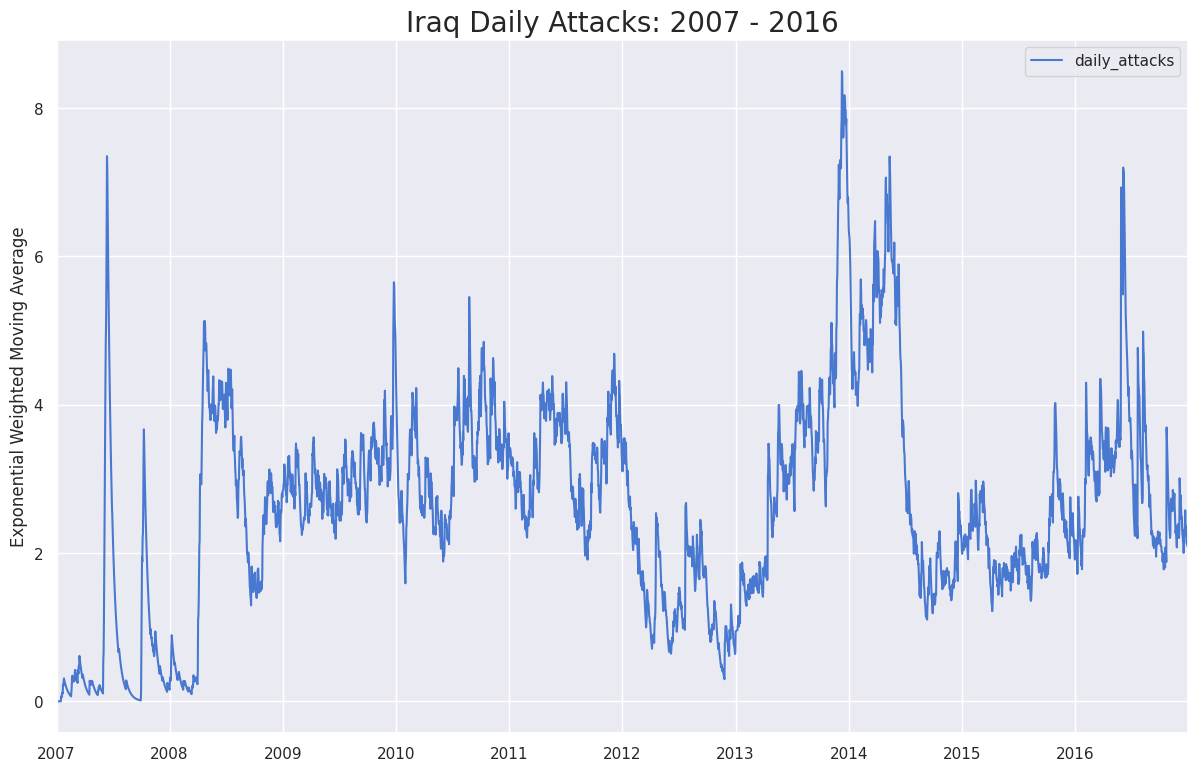

In [ ]:
iraq_ewm.plot()
plt.title('Iraq Daily Attacks: 2007 - 2016', fontsize=20);
plt.ylabel('Exponential Weighted Moving Average')
plt.show();

In [ ]:
!pip install prophet


In [ ]:
import prophet

iraq_fb = iraq_ts.copy()
iraq_fb['index1'] = iraq_fb.index
iraq_fb.columns = ['y', 'ds']

iraq_fb.head()

,y,ds
2007-01-01,0,2007-01-01
2007-01-02,0,2007-01-02
2007-01-03,0,2007-01-03
2007-01-04,0,2007-01-04
2007-01-05,0,2007-01-05


In [ ]:
# Load the preprocessed GTD dataset
iraq_holidays = pd.read_csv('/content/drive/MyDrive/data/Iraq_holidays.csv', na_values=[''])
iraq_holidays.head()

,ds,holiday
0,2007-01-01,New Year's Day
1,2007-01-01,Third Day of the Feast of the Sacrifice
2,2007-01-02,Fourth Day of the Feast of the Sacrifice
3,2007-01-06,Armed Forces
4,2007-01-19,Islamic New Year


In [ ]:
# Make the prophet model and fit on the data
prophet1 = prophet.Prophet(changepoint_prior_scale=0.15, holidays=iraq_holidays)
prophet1.fit(iraq_fb)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_tdwuxm/zdd2zqu_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_tdwuxm/1b37mj5x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25620', 'data', 'file=/tmp/tmpa_tdwuxm/zdd2zqu_.json', 'init=/tmp/tmpa_tdwuxm/1b37mj5x.json', 'output', 'file=/tmp/tmpa_tdwuxm/prophet_model5wxpcarb/prophet_model-20231025181003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Specify 365 days out to predict
future_data = prophet1.make_future_dataframe(periods=365, freq = 'D')

# Predict the values
forecast_data = prophet1.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#forecast_data.tail()

,ds,yhat,yhat_lower,yhat_upper
4013,2017-12-27,4.090924,-0.144895,8.121302
4014,2017-12-28,3.657105,-0.182966,7.757770
4015,2017-12-29,2.783835,-0.991683,7.010143
4016,2017-12-30,3.232981,-0.900950,7.368592
4017,2017-12-31,3.804516,-0.408423,7.895254


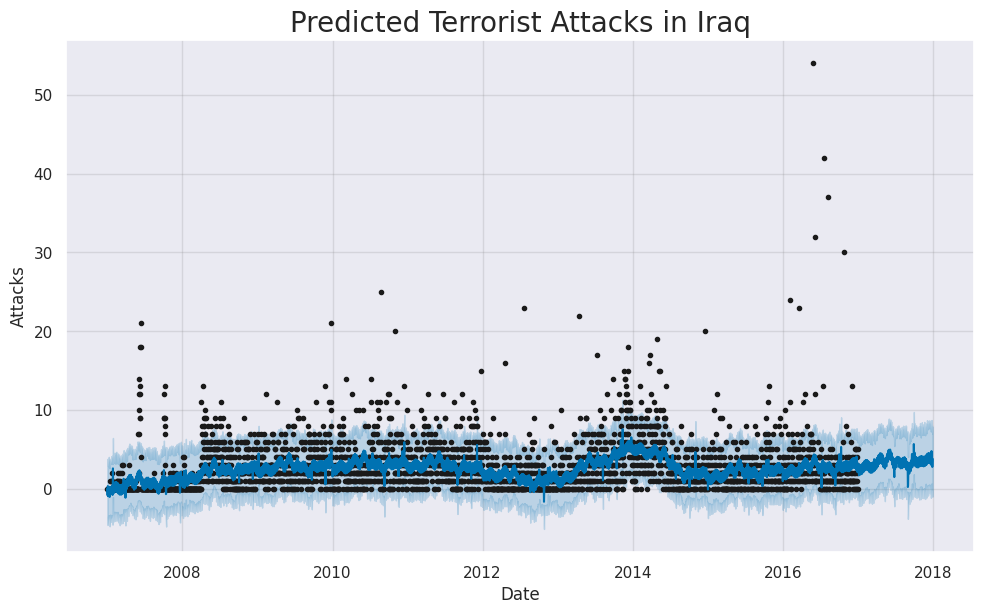

In [ ]:
prophet1.plot(forecast_data, xlabel = 'Date', ylabel = 'Attacks')
plt.title('Predicted Terrorist Attacks in Iraq', fontsize=20);
plt.show();


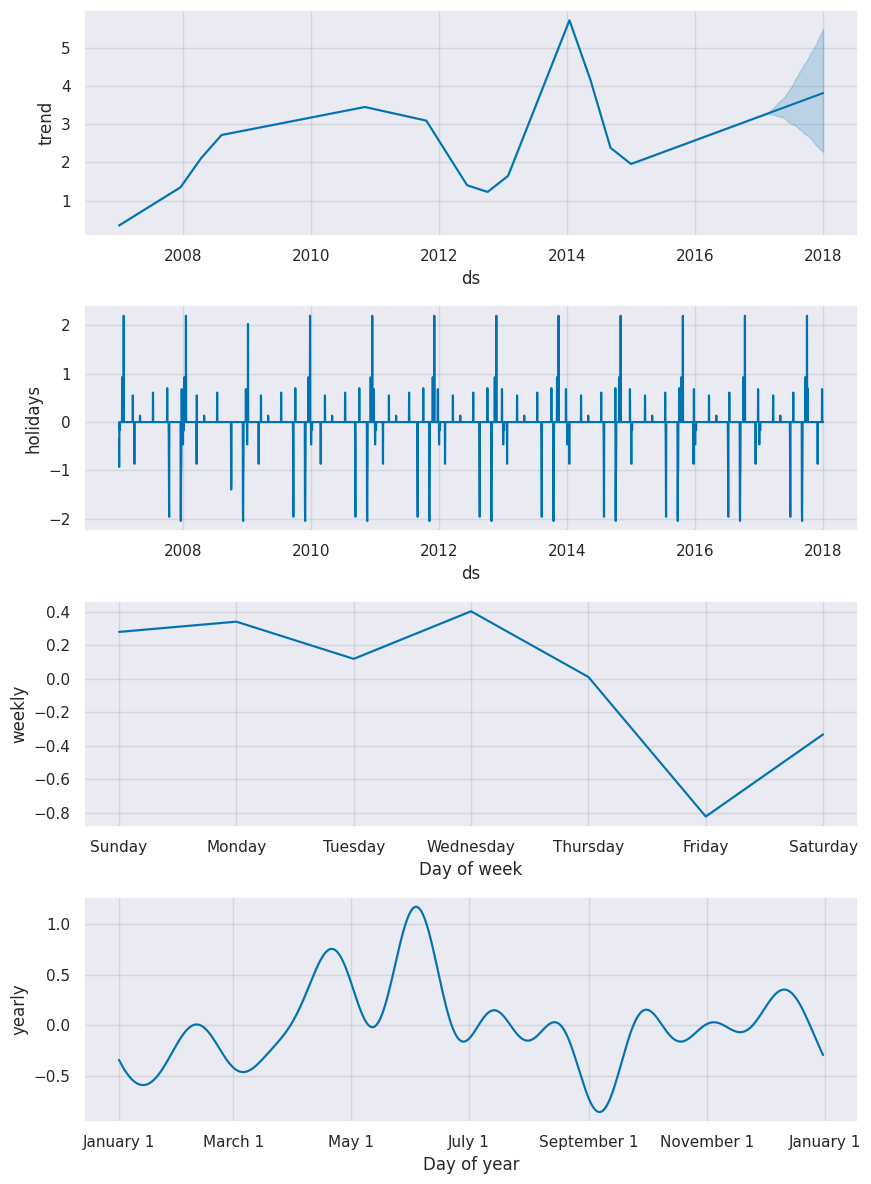

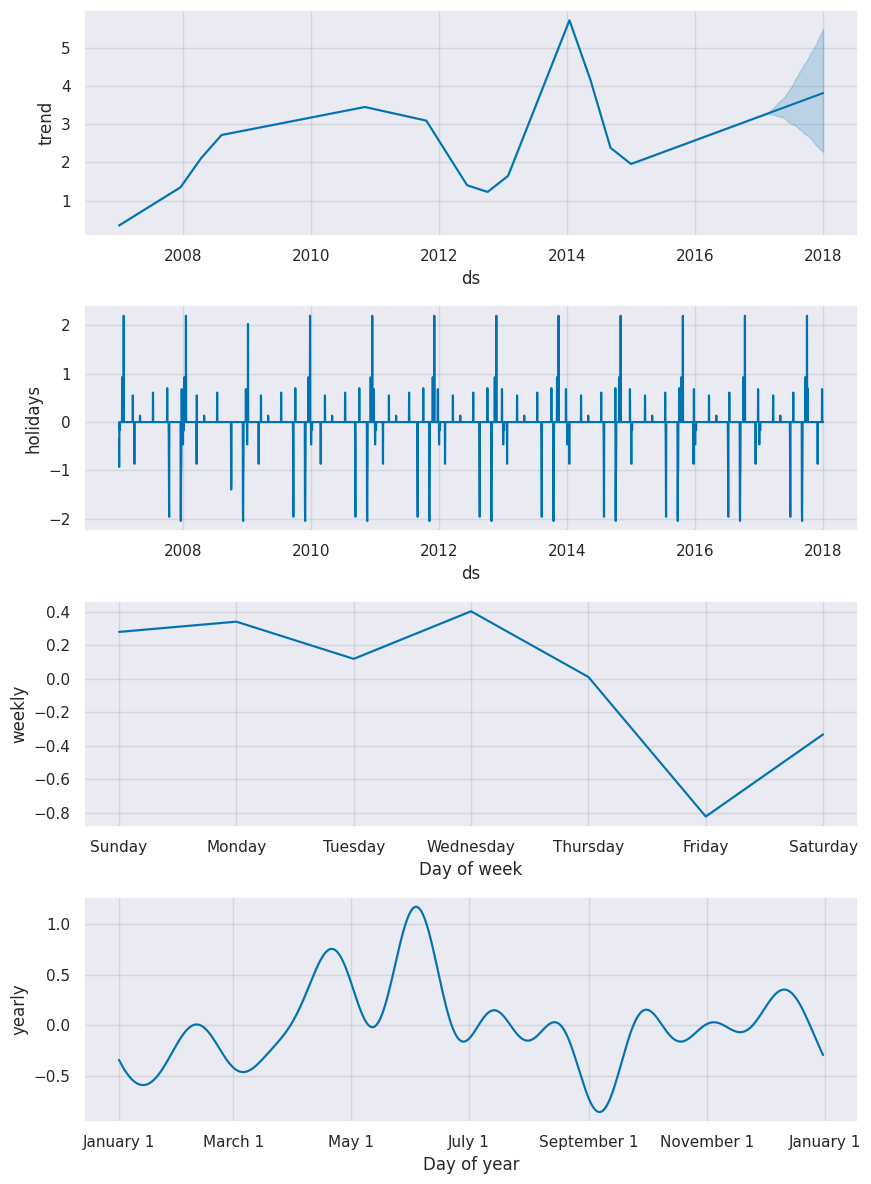

In [ ]:
prophet1.plot_components(forecast_data)

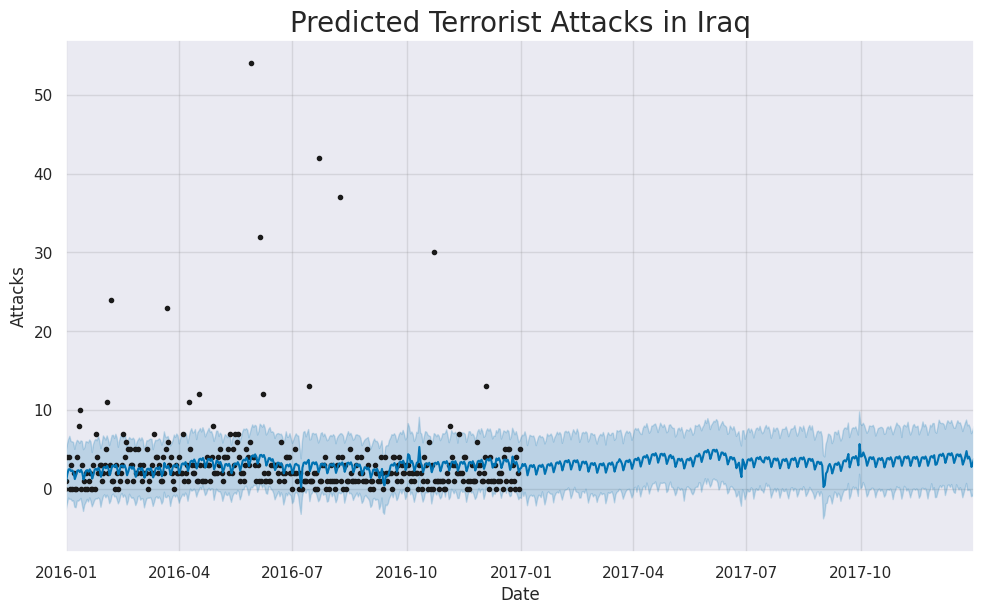

In [ ]:
prophet1.plot(forecast_data, xlabel = 'Date', ylabel = 'Attacks')
plt.title('Predicted Terrorist Attacks in Iraq', fontsize=20);
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-12-31'))
plt.show();